# 巻線内の応力解析
## 1-コアのヤング率

In [2]:
using Plots
gr()

Plots.GRBackend()

In [382]:
rc = 100/2 # mm 外半径
rcin = 80/2 # mm 内半径
Ecm = 50e3 # MPa Cuのヤング率
νc = 0.3 # 銅のポアソン比

Ec = Ecm/(((rc/rcin)^2+1)/((rc/rcin)^2-1)-νc)
println(Ec)

11749.347258485639


## 2-境界条件

\begin{equation} r^2 (d^2\delta\sigma_r/dr^2) \end{equation} 

## ロール内部分布

21901.61983828659
774.197035 seconds (86.09 M allocations: 448.970 GiB, 41.57% gc time)


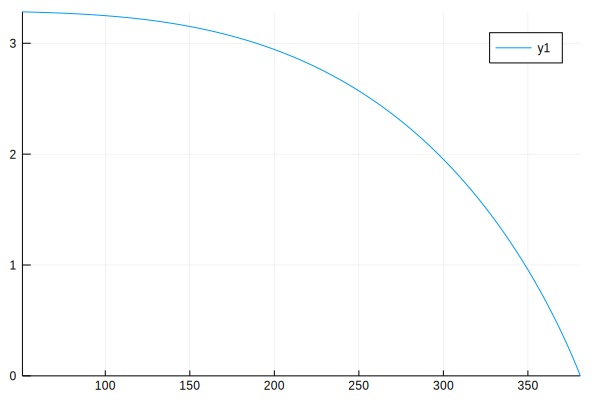

In [36]:
rc = 51 # mm コア外半径
rcin = 38 # mm 内半径
Ecm = 70e3 # MPa Cuのヤング率
νc = 0.3 # 銅のポアソン比
Ec = Ecm/(((rc/rcin)^2+1)/((rc/rcin)^2-1)-νc)
println(Ec)

Δr = 0.1# mm 線材厚さ
ν = 0.01 # ポアソン比
T = 1.5 # N/mm 張力

function CalcArray(n,s,g²)
    A = zeros(Float64,(n,n))
    b = zeros(n)
    du = ones(n)
    dc = ones(n)
    dl = ones(n)
    b[end] = -T/s
    
    for i in 1:n
        Δr_ri = 1/((rc/Δr)+i-1) 
        d ::Float64 = (3-ν)/2*Δr_ri
        
        du[i] = 1 + d
        dc[i] = (1 + ν - g²[i]) * Δr_ri^2 - 2
        dl[i] = 1 - d
        
    end
    
    A = Tridiagonal(dl[2:end], dc ,du[1:end-1])
    A[1,1] = k11
    A[1,2] = 1
    A[end,1:end-1] = 0
    A[end,end] = 1
    # println("A=",A)
    # println("b=",b,"s=",s)
    return A\b
end

function Sumdelta(X,n)
    σ = zeros(n+1)
    C = fill(1,(n+1,n+1))
    C = UpperTriangular(C)-eye(C)
    σ = C*X
    # println(σ)
    return σ
end


m = 3300
sgm = Array{Float64, 2}(m+1,m+1)
sgm = zeros(sgm)

p = Array{Float64, 1}(m+1)
p = ones(p)

X = [0 for i in 1:m+1]

K1 = 2.74e-3 # MPa ファインコート
K2 = 0.183 # MPa ファインコート
Eθ = [6.27e+3 for i in 1:m+1] # MPa 長手方向のヤング率
Er = [K2*(0+K1)*1e+3 for i in 1:m+1] # MPa 半径方向のヤング率
g² = Eθ./Er
k11 =(1-Eθ[1]/Ec-ν)*Δr/rc-1 


@time for i in 1:m
    s =  rc + Δr*(i - 1)
    X = CalcArray(i+1,s,g²)
    sgm = Sumdelta(X,i) #sgm[i,1:i+1] 
    Er[1:i+1] .= (-K2*sgm.+K1*K2)*1e+3 # MPa 半径方向のヤング率
    g² = Eθ./Er
    #println(X,Er)
    
    #println("σ=",sgm)
end

#sumsgm = sgm'*p
r_eq = [rc:Δr:rc+Δr*(m)]
plot(r_eq,-sgm)
# sgm
 

In [257]:
m = 3
K1 = 1.5e-3 # MPa アルミ
K2 = 1.47 # MPa アルミ
Eθ = [5e+3 for i in 1:m+1] # MPa 長手方向のヤング率
Er = [K2*(-X[i]+K1)*1e+3 for i in 1:m+1] # MPa 半径方向のヤング率
g² = Eθ./Er

4-element Array{Float64,1}:
 -3.40647
 -1.70196
 -3.40647
 -1.70196

In [415]:

K1 = 1.5 # MPa アルミ
K2 = 1.47e3 # MPa アルミX =[i*1e3 for i in 1:10]
x = [i*1e3 for i in 0:10]
K2*(X+K1)

10-element Array{Float64,1}:
 1.47221e6
 2.94221e6
 4.41221e6
 5.88221e6
 7.35221e6
 8.82221e6
 1.02922e7
 1.17622e7
 1.32322e7
 1.47022e7

In [308]:
?InexactError

search: InexactError



```
InexactError()
```

Type conversion cannot be done exactly.
